In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import calendar

In [3]:
# read in the KSBP/KPRB data from NCEI download, 4/1998 - 12/2020
df1 = pd.read_csv('https://www.kylemacritchie.com/weatherandvines/data/KSBP.csv')
df2 = pd.read_csv('https://www.kylemacritchie.com/weatherandvines/data/KPRB.csv')

df1['STATION'] = 'KSBP'
df2['STATION'] = 'KPRB'

df = pd.concat([df1, df2])

df['DATE'] = pd.to_datetime(df['DATE'])

In [4]:
# lots of columns in this thing. TAVG isn't always there for some reason so we'll make our own.
df = df[['STATION', 'DATE', 'TMAX', 'TMIN', 'PRCP']]
df.set_index('DATE', inplace=True)

df['TAVG'] = (df['TMAX'] + df['TMIN']) / 2
df['Tdiurnal'] = df['TMAX'] - df['TMIN']

df.drop(labels=['TMAX', 'TMIN'], axis=1, inplace=True)

# bad data, set to nan
df['TAVG'].where(df['TAVG'] > 0, np.nan, inplace=True)

In [4]:
# compute growing degree days (threshold 50F)
df['GDD'] = df['TAVG'] - 50

# set all values below zero to zero
df['GDD'].where(df['GDD'] > 0, 0, inplace=True)

# Just keep April through October
df = df[np.logical_and(df.index.month >= 4, df.index.month <= 10)]

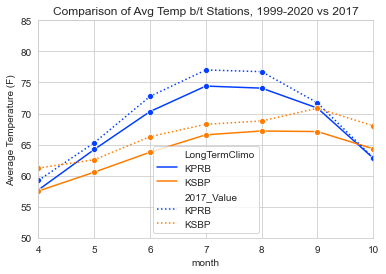

In [6]:
### Average Temperatures ###
# hide warnings
pd.set_option('mode.chained_assignment', None)

df_subset = df[df.index.year >= 1999]
df_subset['month'] = df_subset.index.month
df_subset['year'] = df_subset.index.year

df_avg = df_subset.groupby([df_subset['STATION'], df_subset.index.month], as_index=False).mean()
df_avg.rename(columns={'STATION': 'LongTermClimo'}, inplace=True)

# Isolate 2017 values
df_2017 = df_subset[df_subset['year'] == 2017]
df_2017_avg = df_2017.groupby([df_2017['STATION'], df_2017.index.month], as_index=False).mean()
df_2017_avg.rename(columns={'STATION': '2017_Value'}, inplace=True)

# Plot averages
ax1 = sns.lineplot(data=df_avg, x='month', y='TAVG', hue='LongTermClimo', palette='bright', marker='o', ci=None)
ax2 = sns.lineplot(data=df_2017_avg, x='month', y='TAVG', hue='2017_Value', dashes=True, marker='o', palette='bright', ci=None)

# dashed lines to separate 2017 from avg
ax1.lines[5].set_linestyle(':')
ax1.lines[6].set_linestyle(':')

legend = ax1.legend()
lines = legend.get_lines()
lines[4].set_linestyle(':')
lines[5].set_linestyle(':')

sns.set_style('whitegrid')
plt.title('Comparison of Avg Temp b/t Stations, 1999-2020 vs 2017')
plt.ylabel('Average Temperature (F)')
plt.xlabel('month')
plt.ylim(50, 85)
plt.xlim(4, 10)

plt.savefig('tavg.jpg', dpi=300, transparent=False)

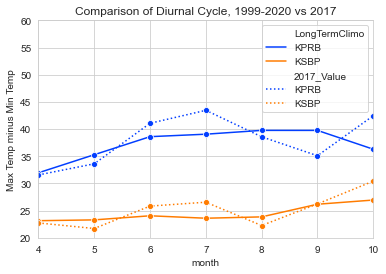

In [17]:
### Diurnal Cycle of Temperatures ###
# hide warnings
pd.set_option('mode.chained_assignment', None)

df_subset = df[df.index.year >= 1999]
df_subset['month'] = df_subset.index.month
df_subset['year'] = df_subset.index.year

df_avg = df_subset.groupby([df_subset['STATION'], df_subset.index.month], as_index=False).mean()
df_avg.rename(columns={'STATION': 'LongTermClimo'}, inplace=True)

# Isolate 2017 values
df_2017 = df_subset[df_subset['year'] == 2017]
df_2017_avg = df_2017.groupby([df_2017['STATION'], df_2017.index.month], as_index=False).mean()
df_2017_avg.rename(columns={'STATION': '2017_Value'}, inplace=True)

# Plot averages
ax1 = sns.lineplot(data=df_avg, x='month', y='Tdiurnal', hue='LongTermClimo', palette='bright', marker='o', ci=None)
ax2 = sns.lineplot(data=df_2017_avg, x='month', y='Tdiurnal', hue='2017_Value', dashes=True, marker='o', palette='bright', ci=None)

# dashed lines to separate 2017 from avg
ax1.lines[5].set_linestyle(':')
ax1.lines[6].set_linestyle(':')

legend = ax1.legend()
lines = legend.get_lines()
lines[4].set_linestyle(':')
lines[5].set_linestyle(':')

sns.set_style('whitegrid')
plt.title('Comparison of Diurnal Cycle, 1999-2020 vs 2017')
plt.ylabel('Max Temp minus Min Temp')
plt.xlabel('month')
plt.ylim(20, 60)
plt.xlim(4, 10)

plt.savefig('Tdiurnal.jpg', dpi=300, transparent=False)

In [1]:
### Average sum of GDDs ###
df_gdd_avg = df_subset.groupby([df_subset['STATION'], df_subset['year']], as_index=False).sum()

# Plot GDDs by year
sns.lineplot(data=df_gdd_avg, x='year', y='GDD', hue='STATION', palette='bright', marker='o', ci=None)
sns.set_style('whitegrid')
plt.title('Cumulative Growing Degree Days, Apr-Oct')
plt.ylabel('GDDs > 50F')
plt.xlabel('year')
plt.ylim(2000, 4500)
plt.xlim(1999, 2020.)

plt.savefig('gdd_avg.jpg', dpi=300, transparent=False)

NameError: name 'df_subset' is not defined